### Kernel Density Estimation (1-D and 2-D Data)

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from numpy.random import rand
import numpy.matlib
from math import pi
import math
from numpy import linalg

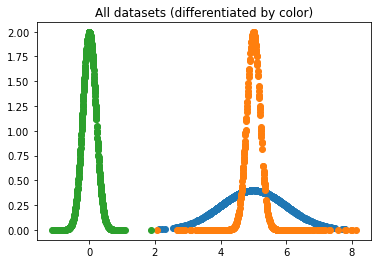

In [19]:
np.random.seed(4)
#Number of instances N
N = 1000
#For set 1
mu1 = np.array([5])
sigma1 = np.array([[1]])
x1 = np.random.multivariate_normal(mu1, sigma1, N)
x1 = x1.reshape(len(x1), 1)

#For set 2 
mu2_1 = np.array([5])
sigma2_1 = np.array([[1]])
x2_1 = np.random.multivariate_normal(mu2_1, sigma2_1, 500)
x2_1 = x2_1.reshape(len(x2_1), 1)

mu2_2 = np.array([0])
sigma2_2 = np.array([[0.2]])
x2_2 = np.random.multivariate_normal(mu2_2, sigma2_2, 500)
x2_2 = x2_2.reshape(len(x2_2), 1)

x2 = np.concatenate((x2_1, x2_2), axis=0)

def gaussian(x, mu, sigma):
    constant_ = 1/(sigma*np.sqrt(2*pi))
    return constant_ * (np.exp(-np.power(x - mu, 2.) / (2 * np.power(sigma, 2.))))

#x_values = np.linspace(-3, 3, 120)
#for mu, sig in [(mu1, sigma1), (mu2, sigma2)]:

#plt.plot(x_values, gaussian(x, mu, sig))
    
plt.scatter(x1,gaussian(x1,mu1,sigma1))
plt.scatter(x2_1,gaussian(x2_1,mu2_1,sigma2_2))
plt.scatter(x2_2,gaussian(x2_2,mu2_2,sigma2_2))
plt.title('All datasets (differentiated by color)')
plt.show()

In [3]:
# 2-D datasets (x3 and x4)

np.random.seed(4)
N2 = 500
mu3 = np.array([1,0])
mu4 = np.array([0,2.5])
cov3 = np.array([[0.9,0.4],[0.4,0.9]])
cov4 = np.array([[0.9,0.4],[0.4,0.9]])

x3 = np.array(np.random.multivariate_normal(mu3, cov3, N2))
x4 = np.array(np.random.multivariate_normal(mu4, cov4, N2))
x3 = x3.reshape(len(x3), 2)
x4 = x4.reshape(len(x4), 2)

In [4]:
x_2d = np.concatenate((x3, x4), axis=0)
print(x_2d.shape)

(1000, 2)


In [13]:
def mykde(x, h):
    # h = 0.1 default bandwidth
    # weightage is equal here 
    _ , d = x.shape # no. of dimensions of data
    print("Dimensions of data = ", d)
    print("h = ",h)
    
    if(d==1):
        grid = np.linspace(min(x), max(x), len(x))
    
        A = (((((2*pi)**0.5)*h)**d)**-1)
        grid = np.linspace(min(x), max(x), len(x))
        B = np.zeros(len(x)*len(x)).reshape(len(x),len(x)) 
        kde = np.zeros(len(x)*len(x)).reshape(len(x),len(x))
        
        
        for i in range(len(x)):
             for j in range(len(x)):    
                B[j][i] = -0.5 * ( ((x[j] - grid[i]) ) / h )**2            
                kde[j][i] = A * np.exp(B[j][i])  #Gaussian kernel where h = std dev

        kde_sums = np.zeros(len(x)).reshape(len(x),1)
        for i in range(len(x)):
            for j in range(len(x)):
                kde_sums[j] += kde[i][j]
        kde_sums_norm = kde_sums/len(x)

        plt.hist(x, bins = 50, density = True)
        plt.plot(grid,kde_sums_norm)
        plt.show()
   

    if(d==2):
        
        min_x = (np.min(x[:,0]))
        max_x = (np.max(x[:,0]))
        min_y = (np.min(x[:,1]))
        max_y = (np.max(x[:,1]))

        grid = np.linspace(min_x,max_x, len(x))
        grid = np.append(grid,np.linspace(min_y,max_y, len(x)))
        grid = grid.reshape(len(x),2)

        A = (((((2*pi)**0.5)*h)**d)**-1)

        B = np.zeros(len(x)*len(x)).reshape(len(x),len(x)) 
        kde = np.zeros(len(x)*len(x)).reshape(len(x),len(x))


        z = (np.sqrt(((x[:,0]**2) + (x[:,1]**2)))).ravel() # Euclidean Distance between features of original data
        z = z.reshape(len(z),1)

        z_grid = np.linspace(np.min(z),np.max(z),len(z)).reshape(len(z),1)

        for i in range(len(x)):
            for j in range(len(x)):    
                B[j][i] = - 0.5 * ( ((z[j] - z_grid[i]) ) / h )**2

            kde[j][i] = ( A * np.exp(B[j][i]) )         

    
        kde_sums = np.zeros(len(x)*1).reshape(len(x),1)
        for i in range(len(x)):
            for j in range(len(x)):
                kde_sums[j] += kde[i][j]
        
        kde_sums = pd.DataFrame(kde_sums, columns = ['0'])

        kde_sums['1'] = kde_sums['0']
        kde_sums = np.array(kde_sums)


        kde_sums_norm = (kde_sums/len(x))
        plot_ = sns.jointplot(x = x[:,0], y = x[:,1],kind = "kde")
        plt.plot(grid[:,0],kde_sums_norm[:,0])
        plt.plot(grid[:,1],kde_sums_norm[:,1])        
        plt.show()

        
        if((d<1 or d>2)):
            print("Only 1-D or 2-D data can be plotted by mykde() as asked by Assignment")
    
    return #kde_sums_norm, grid

### Dataset 1

Dimensions of data =  1
h =  0.1


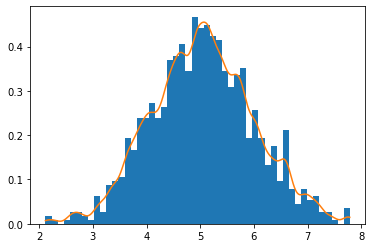

Dimensions of data =  1
h =  1


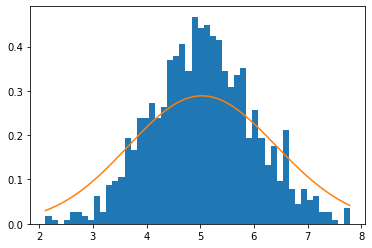

Dimensions of data =  1
h =  5


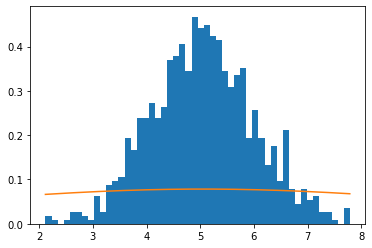

Dimensions of data =  1
h =  10


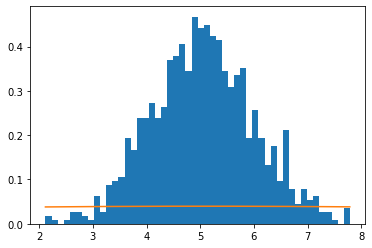

In [14]:
mykde(x1, 0.1)
#print("For h =", 0.1,", Estimated density i.e. p(x) = \n",px01_x1_kde)
#print("For h =", 0.1,", domain i.e. x = \n",x01_x1_kde)

mykde(x1, 1)
#print("For h =", 1,", Estimated density i.e. p(x) = \n ",px02_x1_kde)
#print("For h =", 1,", domain i.e. x = \n",x02_x1_kde)

mykde(x1, 5)
#print("For h =", 5,", Estimated density i.e. p(x) = \n",px03_x1_kde)
#print("For h =", 5,", domain i.e. x = \n",x03_x1_kde)

mykde(x1, 10)
#print("For h =", 10,", Estimated density i.e. p(x) = \n",px04_x1_kde)
#print("For h =", 10,", domain i.e. x = \n",x04_x1_kde)

Dimensions of data =  1
h =  0.1


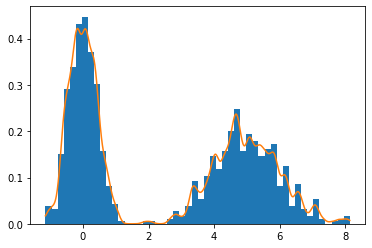

Dimensions of data =  1
h =  1


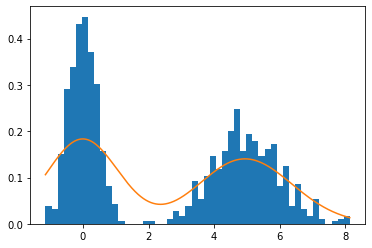

Dimensions of data =  1
h =  5


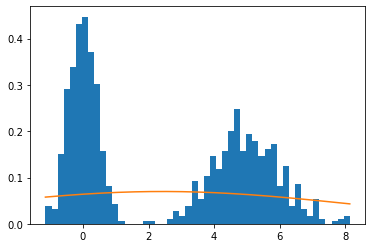

Dimensions of data =  1
h =  10


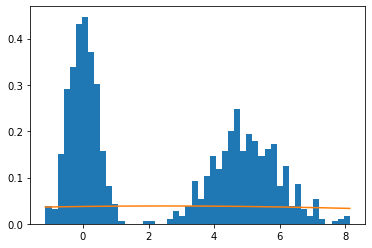

In [15]:
mykde(x2, 0.1)
#print("For h =", 0.1,", Estimated density i.e. p(x) = \n",px01_x2_kde)
#print("For h =", 0.1,", domain i.e. x = ",x01_x2_kde)

mykde(x2, 1)
#print("For h =", 1,", Estimated density i.e. p(x) = \n ",px02_x2_kde)
#print("For h =", 1,", domain i.e. x = \n",x02_x2_kde)

mykde(x2, 5)
#print("For h =", 5,", Estimated density i.e. p(x) = \n",px03_x2_kde)
#print("For h =", 5,", domain i.e. x = \n",x03_x2_kde)

mykde(x2, 10)
#print("For h =", 10,", Estimated density i.e. p(x) = \n",px04_x2_kde)
#print("For h =", 10,", domain i.e. x = \n",x04_x2_kde)

### Dataset 2

Dimensions of data =  2
h =  0.1


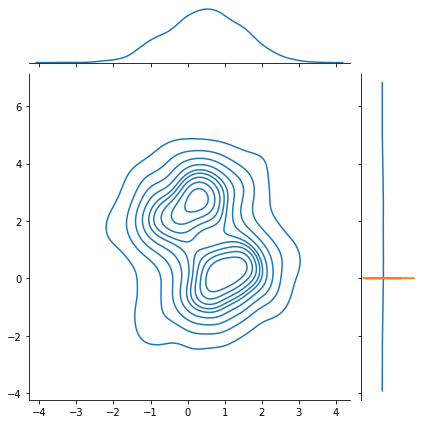

Dimensions of data =  2
h =  1


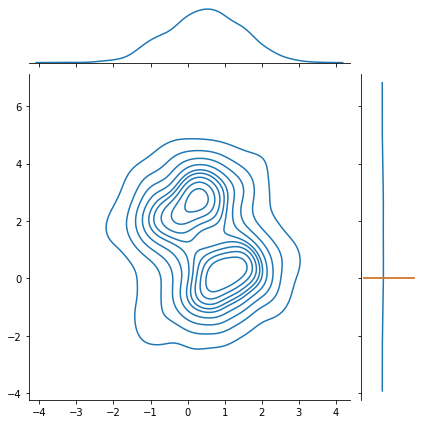

Dimensions of data =  2
h =  5


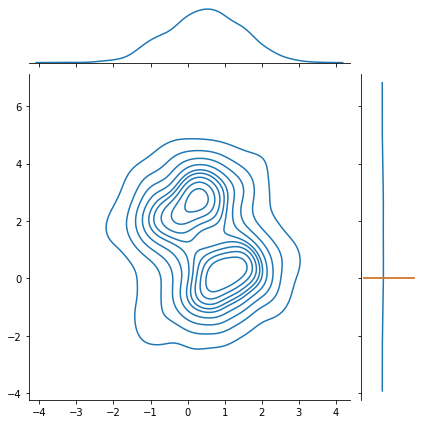

Dimensions of data =  2
h =  10


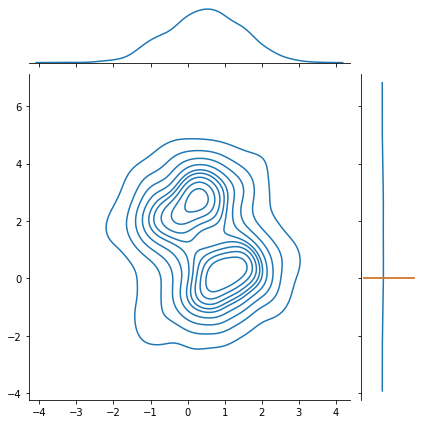

In [16]:
mykde(x_2d, 0.1)
#print("For h =", 0.1,", Estimated density i.e. p(x) = \n",px01_x_2d_kde)
#print("For h =", 0.1,", domain i.e. x = \n",x01_x_2d_kde)

mykde(x_2d, 1)
#print("For h =", 1,", Estimated density i.e. p(x) = \n ",px02_x_2d_kde)
#print("For h =", 1,", domain i.e. x = \n",x02_x_2d_kde)

mykde(x_2d, 5)
#print("For h =", 5,", Estimated density i.e. p(x) = \n",px03_x_2d_kde)
#print("For h =", 5,", domain i.e. x = \n",x03_x_2d_kde)

mykde(x_2d, 10)
#print("For h =", 10,", Estimated density i.e. p(x) = \n",px04_x_2d_kde)
#print("For h =", 10,", domain i.e. x = \n",x04_x_2d_kde)

### Practice

Dimensions of data =  2
h =  0.1


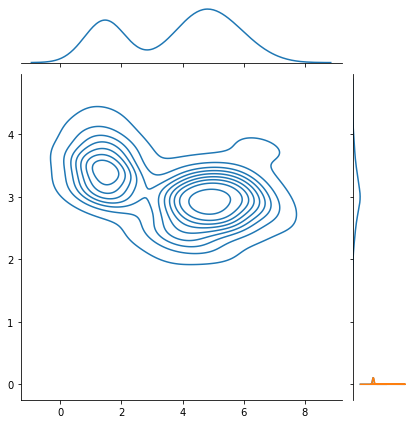

In [17]:
from sklearn import datasets
iris = datasets.load_iris() 
  
iris_df = pd.DataFrame(iris.data, columns=['Sepal_Length', 
                      'Sepal_Width', 'Petal_Length', 'Petal_Width']) 

#iris_df = iris_df[['']] 
iris_df['Target'] = iris.target 
  
iris_df['Target'].replace([0], 'Iris_Setosa', inplace=True) 
iris_df['Target'].replace([1], 'Iris_Vercicolor', inplace=True) 
iris_df['Target'].replace([2], 'Iris_Virginica', inplace=True) 

df = iris_df[['Petal_Length','Sepal_Width']]
df = np.array(df)
mykde(df, 0.1)

#### Randomly generated dataset

(1000, 2)
Dimensions of data =  2
h =  0.1


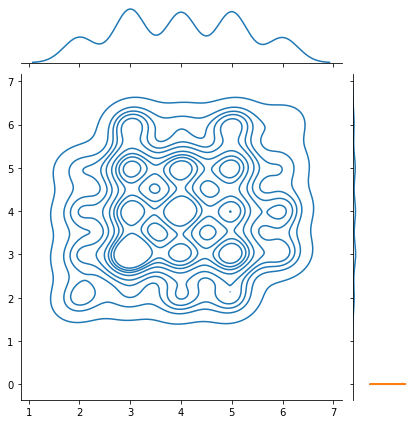

In [12]:
# 2-D datasets 

np.random.seed(4)
N2 = 500

import random

def Rand(start, end, num): 
    res = [] 
  
    for j in range(num): 
        res.append(random.randint(start, end)) 
  
    return res 
  
# Driver Code 
num = N2*2
start = 3
end = 6

x_2d_1 = Rand(start, end, num) 
x_2d_1 = (np.array(x_2d_1)).reshape( N2 , 2 )

start = 2
end = 5

x_2d_2 = Rand(start, end, num) 
x_2d_2 = (np.array(x_2d_2)).reshape( N2 , 2 )
x_2d_conc = np.concatenate((x_2d_1, x_2d_2), axis = 0)
print(x_2d_conc.shape)
mykde(x_2d_conc, 0.1)